
📊 Checking Stationarity of Original Data:


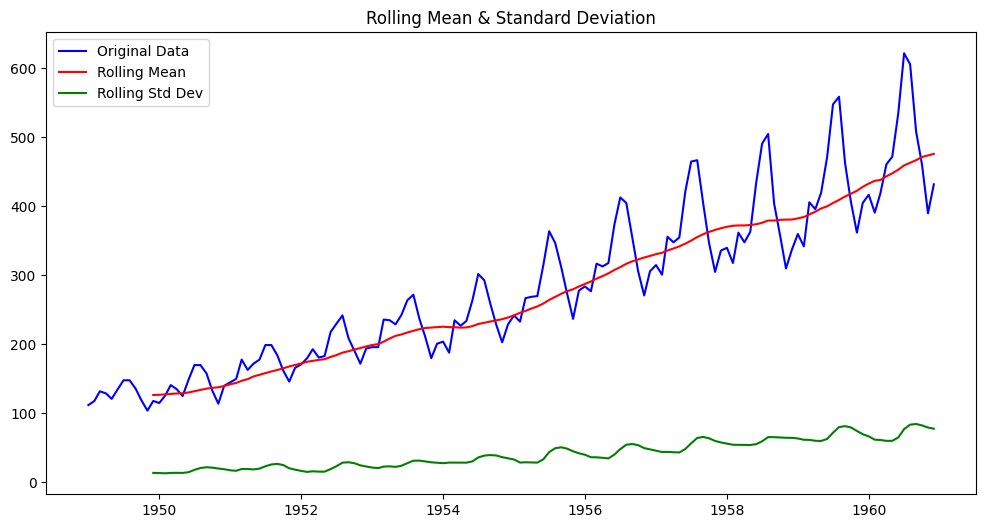

Results of Augmented Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

❌ The data is likely non-stationary (p-value >= 0.05)

📊 Checking Stationarity After First Differencing:


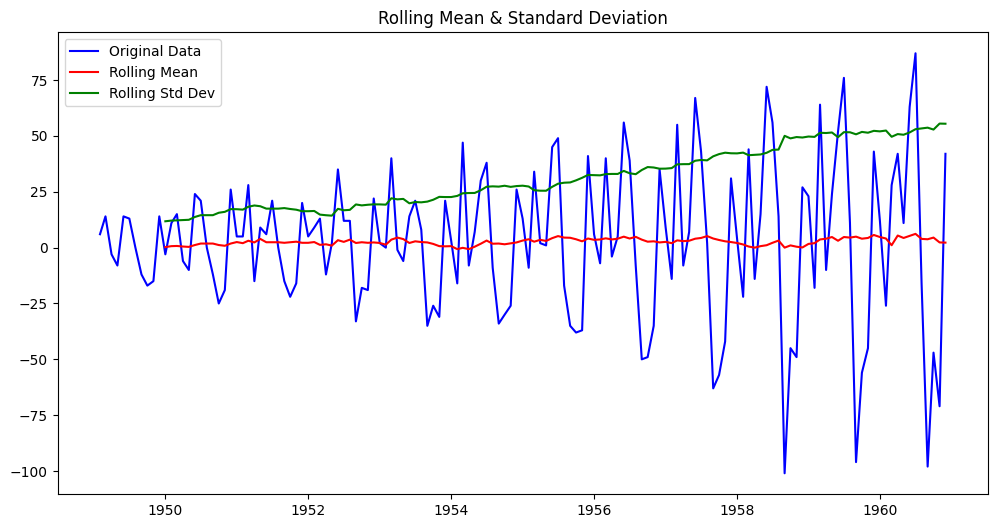

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

❌ The data is likely non-stationary (p-value >= 0.05)


In [2]:
# Install necessary libraries (if needed)
!pip install pandas numpy matplotlib statsmodels --quiet

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load the airline-passenger dataset
file_path = "/content/airline-passengers.csv"  # File uploaded in Google Colab
df = pd.read_csv(file_path)

# Convert the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Extract time series data
time_series = df['Passengers']

# Function to check stationarity using ADF test
def check_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot original data with rolling mean and standard deviation
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Data', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='green')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Augmented Dickey-Fuller test
    print("Results of Augmented Dickey-Fuller Test:")
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_results = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_results[f'Critical Value ({key})'] = value
    print(adf_results)

    # Conclusion
    if adf_test[1] <= 0.05:
        print("\n✅ The data is likely stationary (p-value < 0.05)")
    else:
        print("\n❌ The data is likely non-stationary (p-value >= 0.05)")

# Check stationarity of the original data
print("\n📊 Checking Stationarity of Original Data:")
check_stationarity(time_series)

# Apply first-order differencing if non-stationary
diff_series = time_series.diff().dropna()

# Check stationarity after differencing
print("\n📊 Checking Stationarity After First Differencing:")
check_stationarity(diff_series)
